# 결정트리 (Decision Tree)

- 스무고개처럼 질문/결정을 통해 데이터를 분류하는 모델
    - 데이터 스케일링 영향이 적음
    - 선형 구조가 아닌 복잡한 구조의 데이터에 적합
    - 과대적합 되기 쉬우므로 가지치기 등을 통해 과대적합 방지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wine_df = pd.read_csv('./data/wine_simple.csv')
wine_df.info()
wine_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine_df.drop('class', axis=1)
y = wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [21]:
from sklearn.tree import DecisionTreeClassifier

# dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.8433908045977011, 0.8584615384615385)

### 이진분류

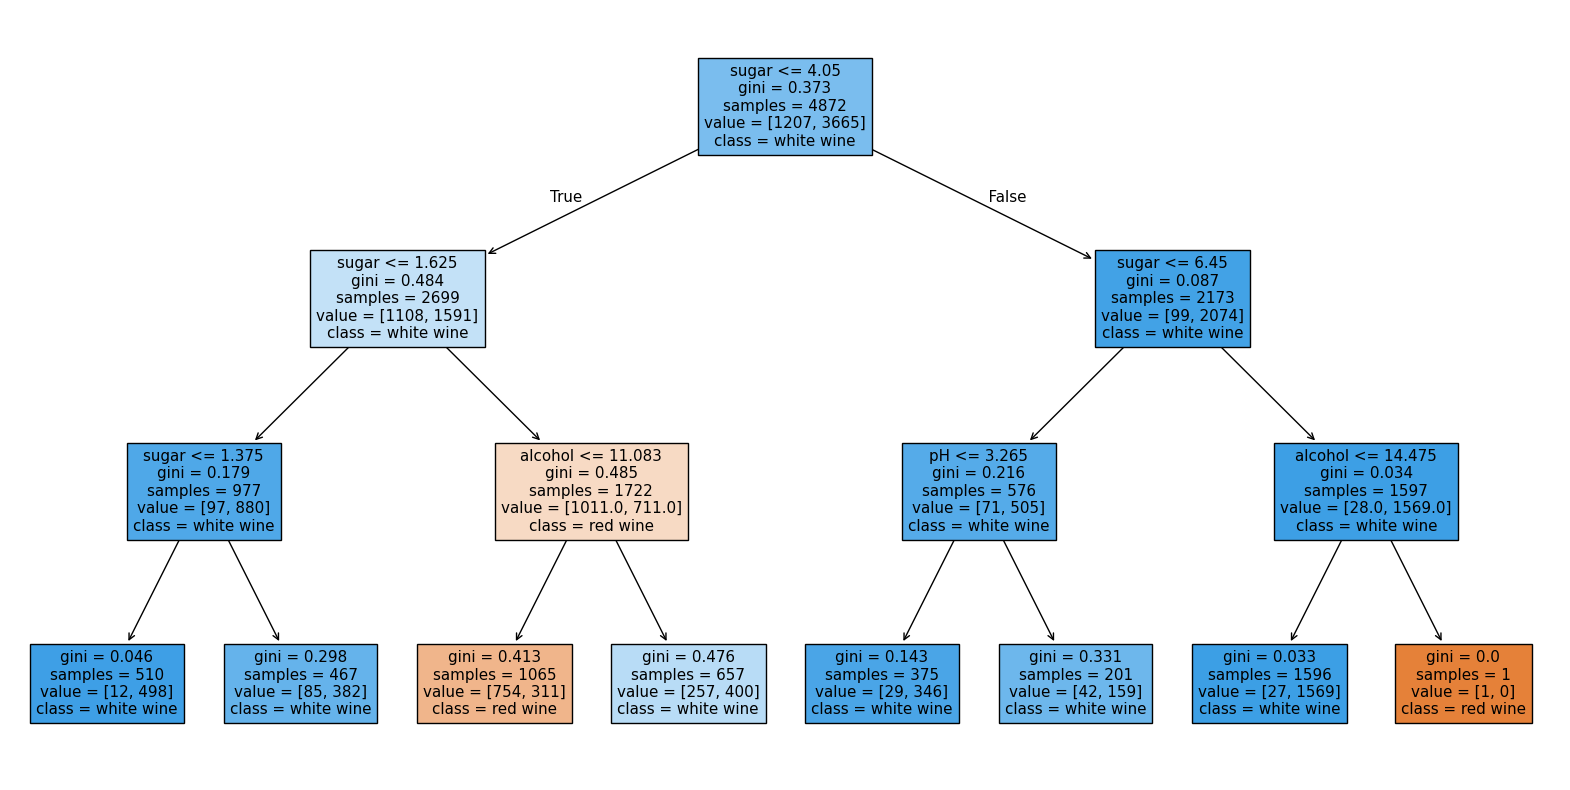

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
# plot_tree(dt_clf)
plot_tree(
    dt_clf
    , filled=True                               # 색 채우기 옵션(특정 클래스의 비율 표현)
    , feature_names=X.columns                   # 특성 이름
    , class_names=['red wine', 'white wine']    # 클래스(class, label) 이름
    , max_depth=3
)
plt.savefig('wine_simple.png')
plt.show()

In [26]:
# 지니불순도 직접 계산
# 지니계수 = 1 - (음성클래스비율^2 + 양성클래스비율^2)

# 샘플 수 4872 / 음성 클래스 (0) 개수 1207, 양성 클래스 (1) 개수 3665
1 - (((1207 / 4872) ** 2) + ((3665 / 4872) ** 2))

0.37273200500969317

In [30]:
print(X.columns)
# 특성 중요도 확인 위의 컬럼 순서대로 중요도가 나옴.
dt_clf.feature_importances_

# sugar가 가장 중요도가 높음.

# feature importances_ : 특성 중요도 (지니불순도 감소에 기여한 정도에 따라 결정)

Index(['alcohol', 'sugar', 'pH'], dtype='object')


array([0.11483515, 0.87892904, 0.00623581])

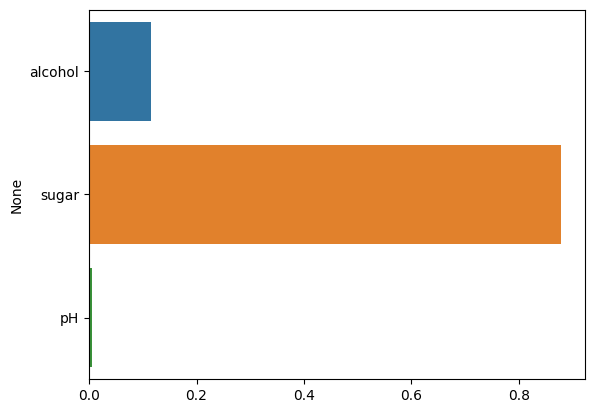

In [31]:
sns.barplot(x=dt_clf.feature_importances_, y=X.columns, hue=X.columns)
plt.show()

### 다중분류

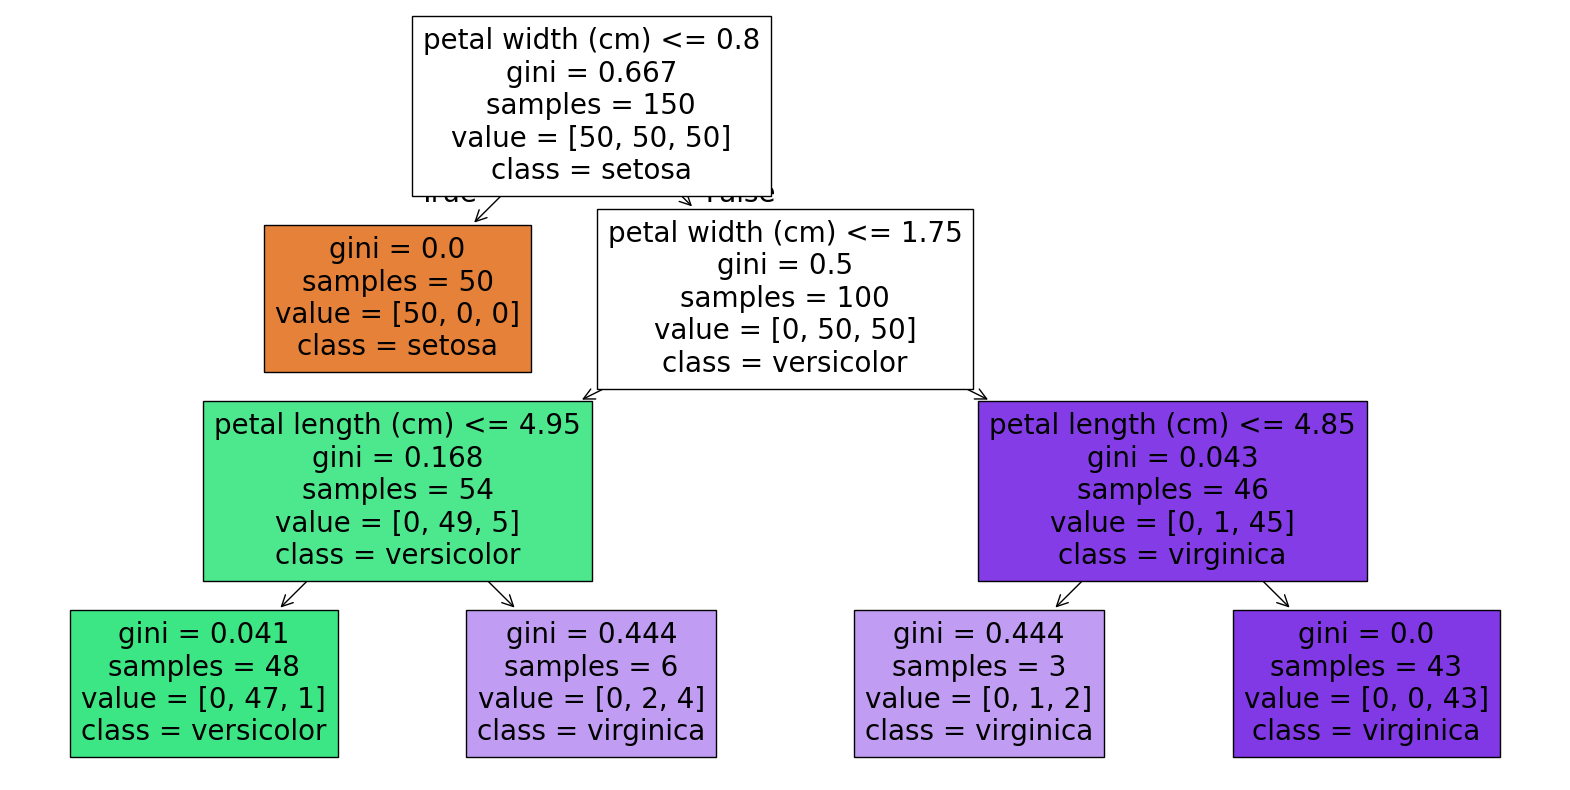

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


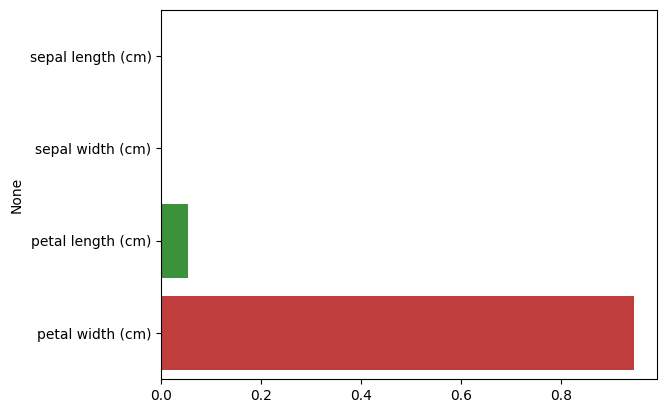

In [33]:
# 1. sklearn.datasets.load_iris 활용 데이터 로드 및 분리
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# 2. DecisionTreeClassifier 모델 학습 및 평가 (max_depth 지정)
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X, y)
dt_clf.score(X, y)

# 3. 트리모델 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf
    , filled=True
    , feature_names=X.columns
    , class_names=iris.target_names
    , max_depth=3
)
plt.show()
# 4. 특성 중요도 확인
print(X.columns)
dt_clf.feature_importances_
sns.barplot(x=dt_clf.feature_importances_, y=X.columns, hue=X.columns)
plt.show()

### 회귀 (DecisionTreeRegressor)

- 각 노드에서 MSE를 최소화하는 방향으로 노드 분할
- 최종 노드(리프 노드)에서 각 샘플들의 평균값을 계산해 예측값으로 사용

In [35]:
from sklearn.datasets import fetch_california_housing

housing_ds = fetch_california_housing()

housing_df = pd.DataFrame(housing_ds.data, columns=housing_ds.feature_names)

housing_df[housing_ds.target_names[0]] = housing_ds.target
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [36]:
X_train, X_test, y_train, y_test = train_test_split(housing_ds.data, housing_ds.target, random_state=0)

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=15)
dt_reg.fit(X_train, y_train)

pred_train = dt_reg.predict(X_train)
pred_test = dt_reg.predict(X_test)

train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)

print(f'r2 score | train : {dt_reg.score(X_train, y_train)}, test : {dt_reg.score(X_test, y_test)}')
print(f'MSE | train : {train_mse}, test : {test_mse}')

r2 score | train : 0.9657895397883021, test : 0.6098870631465009
MSE | train : 0.0456589320051028, test : 0.5156710407687263


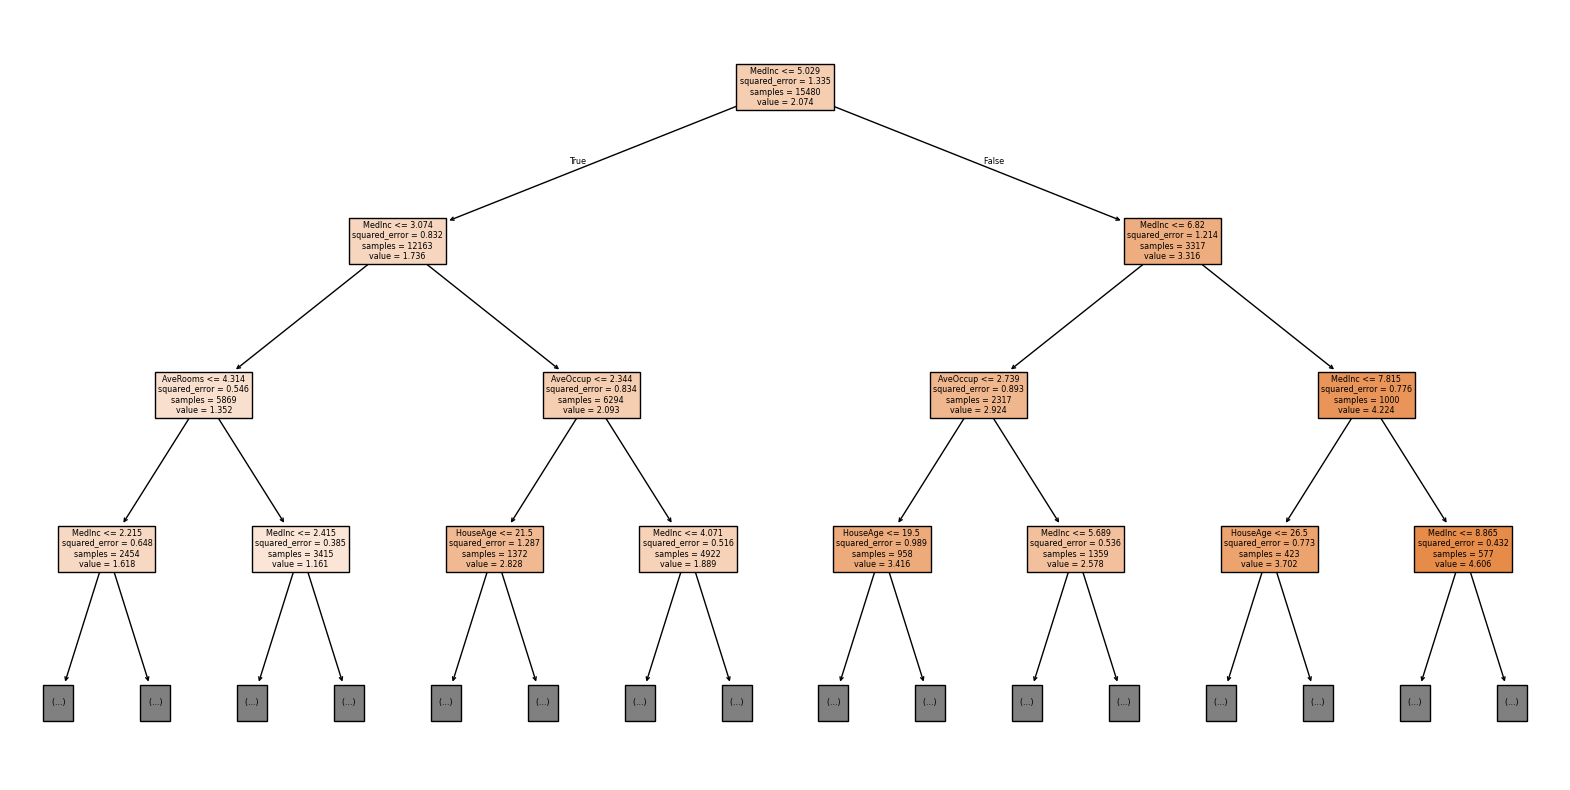

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_reg
    , filled=True
    , feature_names=housing_ds.feature_names
    , max_depth=3
)
plt.show()

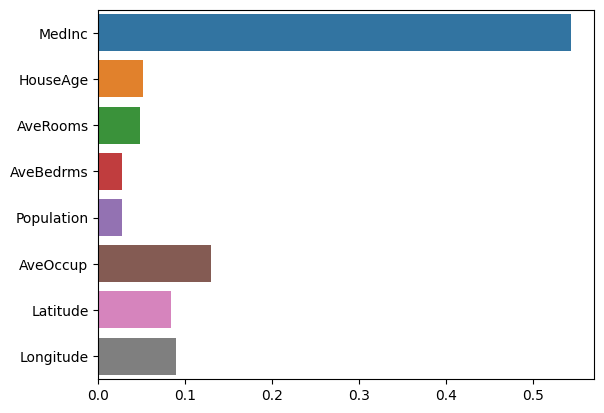

In [40]:
# 특성 중요도 시각화
sns.barplot(x=dt_reg.feature_importances_, y=housing_ds.feature_names, hue=housing_ds.feature_names)
plt.show()